In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h3 style="color:Tomato;">I. Model1 - simple data set (using gradient descent)</h3>
<h4 style="color:Tomato;">Step 1: Model Training</h4>
<p>le programme suivant permet de calculer l'erreur pour plusieurs couple (bias,w1). chaque couple (bias,w1) représente un modèle</p>
<p>pour simplifier, nous allons fixer bias</p> 

In [2]:
#dataset
X=np.array([1,2,3,4,7]) #features x1={1,2...7}
y=np.array([4,7,10,13,22]) #target, output


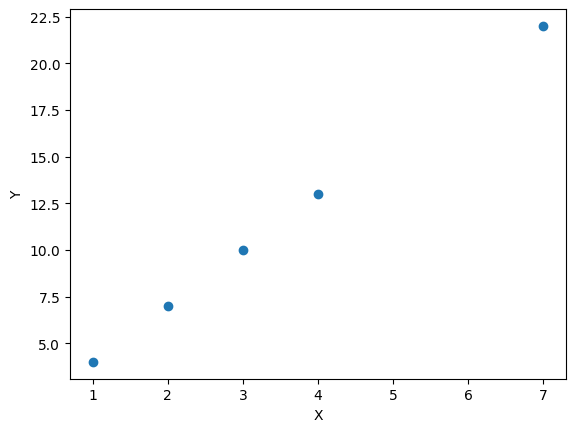

In [3]:
#plot data
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

<p>Un modèle de régression permet de faire la liaison entre la sortie et l'entrée de la manière suivante:</p>
<p>y=H(X). avec y est l'output et X est linput. En général X est une matrice (tableau à deux dimension avec plusieurs colonnes (variables) x1,x2...xn).</p>
<p>le modèle H à trouver a la forme suivante: </p>

$$H(X)=bias+w_1x_1+w_2x_2+ \dots + w_nx_n$$

<p>Dans un premier temps, pour simplifier, nous allons considérer un X avec une seule variable. dans ce cas, notre modèle a la forme suivante:</p>

$$H(x_1)=bias+w_1.x_1$$

<p>Qu'est ce que c'est l'apprentissage?</p>
<p>L'apprentissage est la capacité d'un algorithme de trouver les bons paramètres du modèle qui sont: bias et wi pour i allant de 1 à n, avec n le nombre de variables à l'input.</p>
<p>pour le cas d'une seule dimension, l'algorithme est censé de trouver le bias et le bon w1</p>

In [4]:
def train1(X,y):
    n=len(y)
    w1=0# init w1, et dans la suite on cherche le w1 qui minimise l'erreur,
    #dans ce cas, on sait qu'on doit trouver w1=3
    bias=1#supposer que le bias est connu
    #training: mettre à jour w1 et bias de manière à minimiser mse
    #w1:0, 0.1, 0.2, 0.3, 0.4, 0.5
    epochs=60
    global mseList # 
    mseList=[]
    global w1List # Listing the Weight 1 Updates
    w1List=[]
    for i in range(epochs):
        #predict
        yhat=bias+w1*X #array
       #error: sur quelle base (y,yhat)
        er=y-yhat
        #squared error
        serr=er**2
        #mse
        mse=(1/n)*np.sum(serr)
        #print result (Logs)
        print("iteration ",i,": model(",bias,",",w1,"), yhat:",yhat,", mse",round(mse,3))#w1
        mseList.append(mse)
        w1List.append(w1)
        #update bias and w1
        dw1=0.1
        w1=w1+dw1
        
    return bias,w1
    
bias,w1=train1(X,y)
    

iteration  0 : model( 1 , 0 ), yhat: [1 1 1 1 1] , mse 142.2
iteration  1 : model( 1 , 0.1 ), yhat: [1.1 1.2 1.3 1.4 1.7] , mse 132.878
iteration  2 : model( 1 , 0.2 ), yhat: [1.2 1.4 1.6 1.8 2.4] , mse 123.872
iteration  3 : model( 1 , 0.30000000000000004 ), yhat: [1.3 1.6 1.9 2.2 3.1] , mse 115.182
iteration  4 : model( 1 , 0.4 ), yhat: [1.4 1.8 2.2 2.6 3.8] , mse 106.808
iteration  5 : model( 1 , 0.5 ), yhat: [1.5 2.  2.5 3.  4.5] , mse 98.75
iteration  6 : model( 1 , 0.6 ), yhat: [1.6 2.2 2.8 3.4 5.2] , mse 91.008
iteration  7 : model( 1 , 0.7 ), yhat: [1.7 2.4 3.1 3.8 5.9] , mse 83.582
iteration  8 : model( 1 , 0.7999999999999999 ), yhat: [1.8 2.6 3.4 4.2 6.6] , mse 76.472
iteration  9 : model( 1 , 0.8999999999999999 ), yhat: [1.9 2.8 3.7 4.6 7.3] , mse 69.678
iteration  10 : model( 1 , 0.9999999999999999 ), yhat: [2. 3. 4. 5. 8.] , mse 63.2
iteration  11 : model( 1 , 1.0999999999999999 ), yhat: [2.1 3.2 4.3 5.4 8.7] , mse 57.038
iteration  12 : model( 1 , 1.2 ), yhat: [2.2 3.4 4.

<h3 style="color:Tomato;">Analyse du code et interprétation du résultat</h3>
<h3 style="color:DodgerBlue;">Graphe 1: Evolutionde mse en fonction de w1 et en fonction des itérations</h3>



In [5]:
#cette fonction est utilisé dans tout le tutorial
def tracer_graphes(w1List,mseList,iterations):
    plt.figure(figsize=(10,3))
    
    plt.subplot(121) # 1, 2,1
    plt.plot(w1List,mseList)
    plt.xlabel("w1")
    plt.ylabel("mse")
    plt.title("mse en fonction de w1")
   


    plt.subplot(122)
    plt.plot(iterations,mseList)

    plt.xlabel("iteration")
    plt.ylabel("mse")
    plt.title("mse en fonction des iterations")


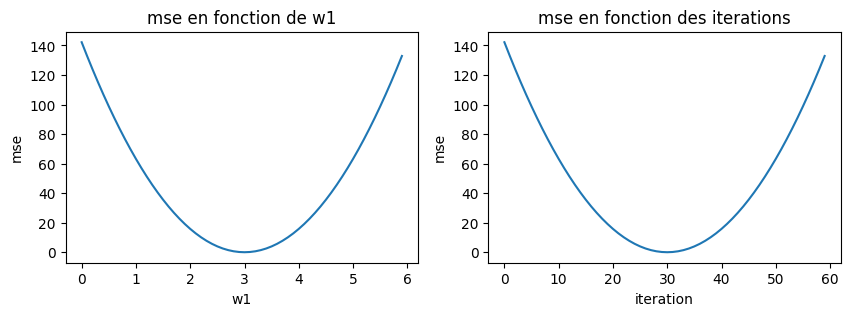

In [6]:
tracer_graphes(w1List,mseList,[i for i in range(60)])

<h4 style="color:Tomato;">Step 2: Model Prediction</h4>

In [7]:
def predict(x1):
    return bias+w1*x1
yhat=predict(X)
print(yhat)

[ 7. 13. 19. 25. 43.]


<h4 style="color:Tomato;">Step 3: Model Evaluation</h4>
Vu que le dataset est tres petit, nous allons utiliser le dataset de training (X) pour évaluer le modèle (bad practice)
<br>dans l'exemple suivant, nous allons utiliser un dataset de test pour évaluer le modèle

In [8]:
def mse(y,yhat):
    return 1/(len(y))*np.sum((y-yhat)**2)
print("mean squared error du modèle est:",round(mse(y,yhat),3))

mean squared error du modèle est: 142.2


In [9]:
class NN_One_Neurone:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.bias = 0
        self.w1 = 0

    def activation_function(self, x):
        return self.bias + self.w1 * x

    def fit(self, X, y):
        n = len(X)
        for _ in range(self.epochs):
            yhat = self.activation_function(X)
            error = y - yhat
            mse = (1/n) * np.sum(error**2)
            dw1 = (-2/n) * np.sum(X * error) 
            dbias = (-2/n) * np.sum(error)    

            self.w1 -= self.learning_rate * dw1
            self.bias -= self.learning_rate * dbias

    def predict(self, X):
        return self.activation_function(X)


In [10]:
model = NN_One_Neurone(learning_rate=0.01, epochs=60)

model.fit(X, y)

model.predict(5)

16.02258258702485

<h3 style="color:Tomato;">questions</h3>
<p>
    <span style="color:Tomato;"><b> 1) </b></span>
    <span  style="color:DodgerBlue;">comment varie mse à partir de l'itération 0 à l'iération 30?</span>
</p>
<p>
    <span style="color:Tomato;"><b> 2) </b></span>
    <span  style="color:DodgerBlue;">comment varie mse à partir de l'itération 30 à l'iération 59?</span>
</p>

<p>
    <span style="color:Tomato;"><b> 3) </b></span>
    <span  style="color:DodgerBlue;">à quelle itération, mse est minimal?</span>
</p>


<p>
    <span style="color:Tomato;"><b> 4) </b></span>
    <span  style="color:DodgerBlue;">comment se comporte l'algorithme si on initialise w1 à 6?</span>
</p>

<p>
    <span style="color:Tomato;"><b> 5) </b></span>
    <span  style="color:DodgerBlue;">comment se comporte l'algorithme si dw1=2? (ou autre valeur plus grande que 2)</span>
</p>

<p>
    <span style="color:Tomato;"><b> 6) </b></span>
    <span  style="color:DodgerBlue;">comment la dérivée partielle (dmse/dw1) permet de régler le problème en 4)? (Algorithme du gradient)</span>
</p>

<p>
    <span style="color:Tomato;"><b> 7) </b></span>
    <span  style="color:DodgerBlue;">comment le learning rate permet de régler le problème en 5)?</span>
</p>

<p>
    <span style="color:Tomato;"><b> 8) </b></span>
    <span  style="color:DodgerBlue;">justifier la valeur de mse  trouvé?</span>
</p>

<p>
    <span style="color:Tomato;"><b> 9) </b></span>
    <span  style="color:DodgerBlue;">Modifier l'algorithme de manière à assurer de trouver les bons paramètres</span>
</p>
<p>
    <span style="color:Tomato;"><b> 10) </b></span>
    <span  style="color:DodgerBlue;">Compléter le code source de la classe NN_One_Neurone</span>
</p>
<p>
    <span style="color:Tomato;"><b> 11) </b></span>
    <span  style="color:DodgerBlue;">Tester les fonctions de la classes</span>
</p>





<h3 style="color:Tomato;">I.2. Model2 (cloud of points)</h3>
<h4 style="color:Tomato;">Step 1: Load / Initialize Data</h4>

In [11]:
X=np.linspace(0,10,100) # générer 100 valeurs entre 0 et 10
y=2+3*X     # y à générer sur une droite bias=2, w1=3 (ideal model +/-)
 # valeurs aléatoires à ajouter à y
r=np.random.uniform(-7, 7, size=len(y))
y=y+r # update de y autour de la droite


In [12]:
#fonction qui trace :
#---1. un nuage de points
#---2. la droite sur la quelle nous nous sommes basés pour créer les y (modèle atendu)
def plot_data(X,y):
    plt.scatter(X,y,color="black")
    plt.plot(X,2+3*X,color="r") # model to find +/- (bias=2, w1=3)
    plt.show()


In [13]:
#fonction qui trace :
#---1. un nuage de points
#---2. la droite sur la quelle nous nous sommes basés pour créer les y (modèle atendu)
#---3. le modèle résultat de l'apprentissage (bias,w1)

def plot_data_model(X,y,bias,w1):
    plt.scatter(X,y,color="black")
    plt.plot(X,2+3*X,color="r") # model to find +/- (bias=2, w1=3)
    plt.plot(X,bias+w1*X,color="b") #trained model (initial model: bias=1, w1=0)
    plt.show()


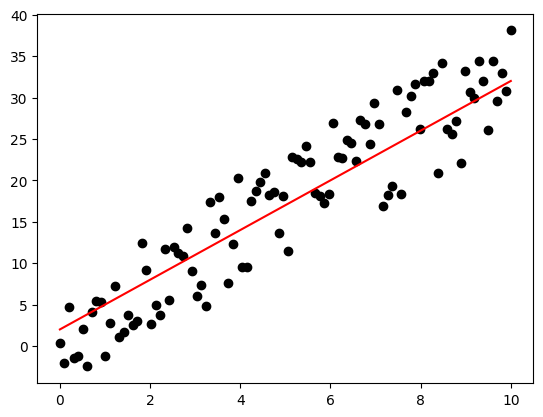

In [14]:
plot_data(X,y)

<h4 style="color:Tomato;">Step 3: Split Data</h4>
<h4 style="color:DodgerBlue;">Pourquoi?</h4>
<p style="color:DodgerBlue;">En machine learning, toujours il faut diviser le dataset d'origine en training dataset et en testdataset afin d'évaluer la performance du modèle sur un dataset non utilisé dans la phase d'entrainement.<br></p>

In [15]:
#data(X,y)-->data_train(X_train,y_train),data_test(X_test,y_test)
from sklearn.model_selection import train_test_split #split data ino training data and test data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44) #
#valeur utiliser pendant la genearation des datasets de manièere aleoire

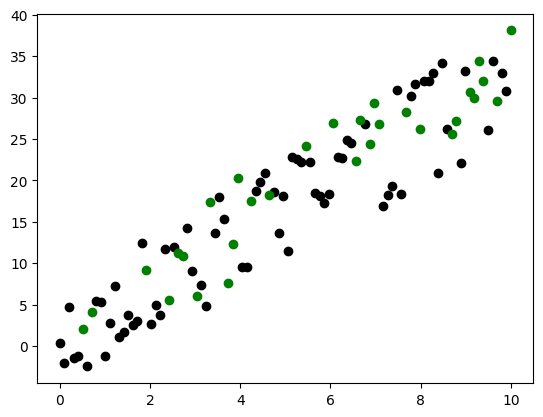

In [36]:
plt.scatter(X_train,y_train,color="black")
plt.scatter(X_test,y_test,color="green")



iteration  0 : (bias= 1 ,w1: 0.5 ) --->mse= 243.95  | update: dbias= -24.95 , dw1= -165.38


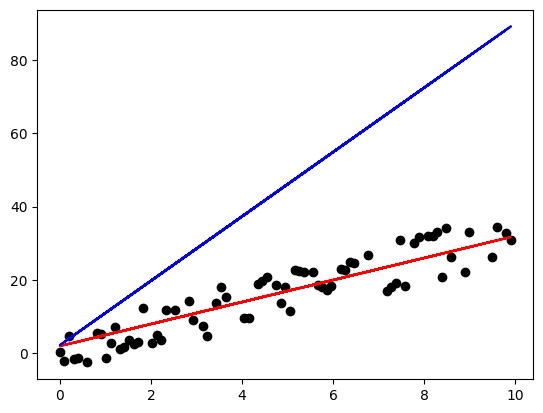

iteration  1 : (bias= 2.25 ,w1: 8.77 ) --->mse= 1004.79  | update: dbias= 54.77 , dw1= 344.9
iteration  2 : (bias= -0.49 ,w1: -8.48 ) --->mse= 4322.17  | update: dbias= -111.77 , dw1= -720.58
iteration  3 : (bias= 5.1 ,w1: 27.55 ) --->mse= 18786.04  | update: dbias= 235.89 , dw1= 1504.23
iteration  4 : (bias= -6.7 ,w1: -47.66 ) --->mse= 81848.45  | update: dbias= -490.11 , dw1= -3141.3
iteration  5 : (bias= 17.81 ,w1: 109.41 ) --->mse= 356800.04  | update: dbias= 1025.75 , dw1= 6558.85
iteration  6 : (bias= -33.48 ,w1: -218.54 ) --->mse= 1555586.16  | update: dbias= -2139.51 , dw1= -13695.62
iteration  7 : (bias= 73.5 ,w1: 466.25 ) --->mse= 6782281.19  | update: dbias= 4469.68 , dw1= 28596.91
iteration  8 : (bias= -149.99 ,w1: -963.6 ) --->mse= 29570616.84  | update: dbias= -9330.76 , dw1= -59712.37
iteration  9 : (bias= 316.55 ,w1: 2022.02 ) --->mse= 128927521.59  | update: dbias= 19485.32 , dw1= 124682.6
iteration  10 : (bias= -657.72 ,w1: -4212.11 ) --->mse= 562122585.29  | update: 

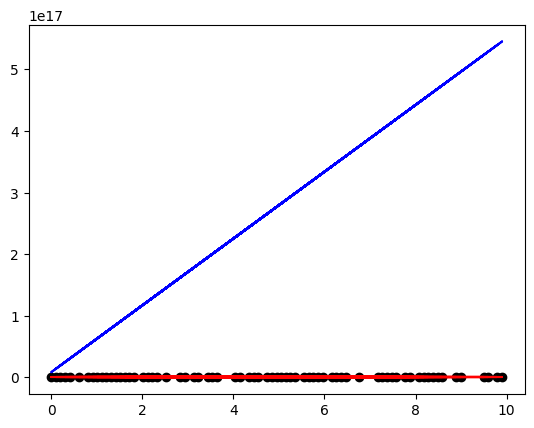

iteration  51 : (bias= 8475613860215342.0 ,w1: 5.423567161679693e+16 ) --->mse= 9.30538376198375e+34  | update: dbias= 5.234638780868227e+17 , dw1= 3.3496588522557604e+18
iteration  52 : (bias= -1.7697580044125794e+16 ,w1: -1.132472709959911e+17 ) --->mse= 4.05713756972744e+35  | update: dbias= -1.0930233532860212e+18 , dw1= -6.994284618908382e+18
iteration  53 : (bias= 3.695358762017527e+16 ,w1: 2.3646695994942803e+17 ) --->mse= 1.7689077291944813e+36  | update: dbias= 2.2822970234260623e+18 , dw1= 1.4604477496970826e+19
iteration  54 : (bias= -7.716126355112784e+16 ,w1: -4.9375691489911315e+17 ) --->mse= 7.712419164071347e+36  | update: dbias= -4.765570367256743e+18 , dw1= -3.0495007649948344e+19
iteration  55 : (bias= 1.611172548117093e+17 ,w1: 1.030993467598304e+18 ) --->mse= 3.362606674200094e+37  | update: dbias= 9.950791107453465e+18 , dw1= 6.3675368856112234e+19
iteration  56 : (bias= -3.36422300560964e+17 ,w1: -2.152774975207308e+18 ) --->mse= 1.4660929864976438e+38  | update:

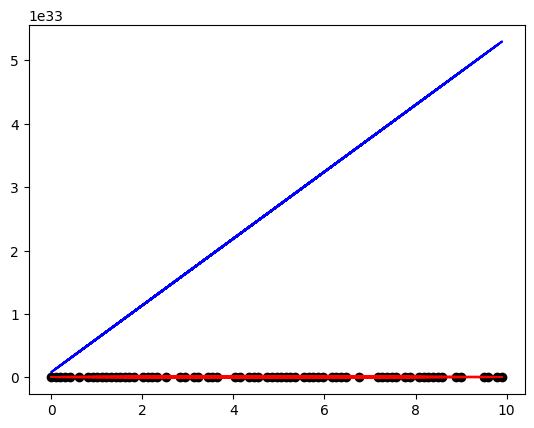

iteration  101 : (bias= 8.228246634363747e+31 ,w1: 5.265276236074636e+32 ) --->mse= 8.770140786462597e+66  | update: dbias= 5.081861873506183e+33 , dw1= 3.2518965153327435e+34
iteration  102 : (bias= -1.7181062733167168e+32 ,w1: -1.0994206340589085e+33 ) --->mse= 3.8237721932460047e+67  | update: dbias= -1.0611226368125471e+34 , dw1= -6.790151111703993e+34
iteration  103 : (bias= 3.58750691074602e+32 ,w1: 2.295654921793088e+33 ) --->mse= 1.6671606695767497e+68  | update: dbias= 2.2156864519010477e+34 , dw1= 1.4178234732373475e+35
iteration  104 : (bias= -7.490925348759219e+32 ,w1: -4.793462444393649e+33 ) --->mse= 7.268803050278326e+68  | update: dbias= -4.626483577698949e+34 , dw1= -2.9604987697517502e+35
iteration  105 : (bias= 1.5641492539735527e+33 ,w1: 1.0009031404365103e+34 ) --->mse= 3.169190513422383e+69  | update: dbias= 9.660369713572623e+34 , dw1= 6.1816954868784404e+35
iteration  106 : (bias= -3.266035602812759e+33 ,w1: -2.0899446030027107e+34 ) --->mse= 1.3817637430665914e

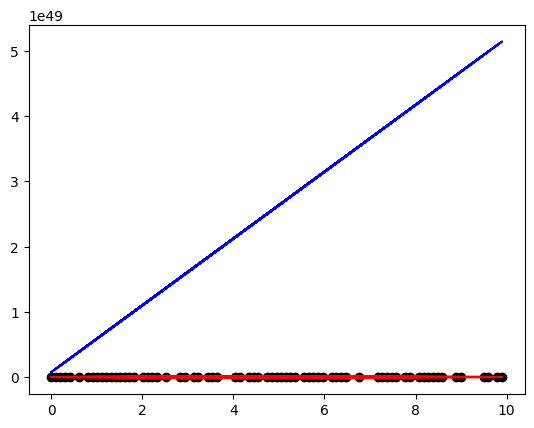

iteration  151 : (bias= 7.988099008818949e+47 ,w1: 5.1116051513200735e+48 ) --->mse= 8.265684831678333e+98  | update: dbias= 4.933543876185544e+49 , dw1= 3.156987446441552e+50
iteration  152 : (bias= -1.667962037210877e+48 ,w1: -1.0673332080887687e+49 ) --->mse= 3.6038299255461624e+99  | update: dbias= -1.0301529669708421e+50 , dw1= -6.591975395901308e+50
iteration  153 : (bias= 3.4828027976433336e+48 ,w1: 2.228654489861886e+49 ) --->mse= 1.5712660713226045e+100  | update: dbias= 2.151019960481889e+50 , dw1= 1.3764432186497363e+51
iteration  154 : (bias= -7.272297004766111e+48 ,w1: -4.6535616033867965e+49 ) --->mse= 6.8507036067064505e+100  | update: dbias= -4.491456141699846e+50 , dw1= -2.874094365317032e+51
iteration  155 : (bias= 1.518498370373312e+49 ,w1: 9.716910223198366e+49 ) --->mse= 2.986899594123859e+101  | update: dbias= 9.378424488582574e+50 , dw1= 6.001278010472834e+51
iteration  156 : (bias= -3.170713873917975e+49 ,w1: -2.0289479829165804e+50 ) --->mse= 1.3022850932630567

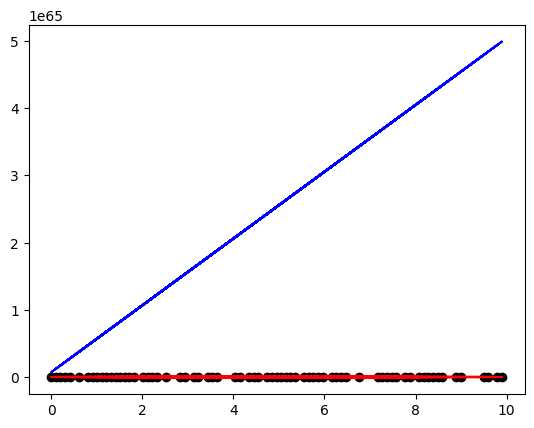

iteration  201 : (bias= 7.75496027406432e+63 ,w1: 4.9624190738530356e+64 ) --->mse= 7.790245037126065e+130  | update: dbias= 4.789554652231191e+65 , dw1= 3.064848370788248e+66
iteration  202 : (bias= -1.6192812987091633e+64 ,w1: -1.0361822780088206e+65 ) --->mse= 3.3965386733033552e+131  | update: dbias= -1.0000871704580342e+66 , dw1= -6.399583588834642e+66
iteration  203 : (bias= 3.381154553581008e+64 ,w1: 2.1636095164085004e+65 ) --->mse= 1.480887302551562e+132  | update: dbias= 2.0882408097145952e+66 , dw1= 1.3362706782113514e+67
iteration  204 : (bias= -7.060049494991969e+64 ,w1: -4.5177438746482565e+65 ) --->mse= 6.456653121884164e+132  | update: dbias= -4.360369583943636e+66 , dw1= -2.790211739030641e+67
iteration  205 : (bias= 1.474179842472621e+65 ,w1: 9.433314820504948e+65 ) --->mse= 2.815093995640837e+133  | update: dbias= 9.104708049058451e+66 , dw1= 5.826126155103011e+67
iteration  206 : (bias= -3.078174182056604e+65 ,w1: -1.9697315955010108e+66 ) --->mse= 1.227378032348207

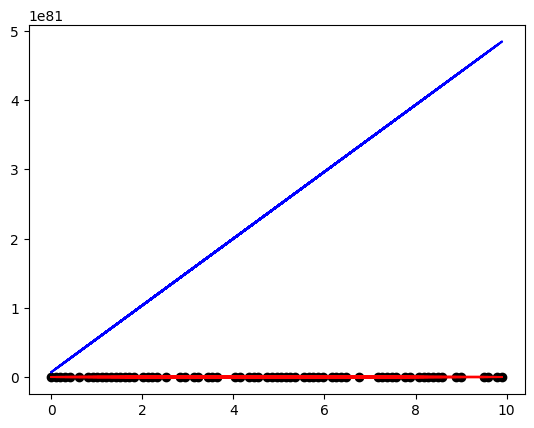

iteration  251 : (bias= 7.52862587030046e+79 ,w1: 4.817587105330484e+80 ) --->mse= 7.342152401683692e+162  | update: dbias= 4.649767863105705e+81 , dw1= 2.975398444017001e+82
iteration  252 : (bias= -1.5720213445228064e+80 ,w1: -1.0059405114754521e+81 ) --->mse= 3.201170753777178e+163  | update: dbias= -9.708988670447308e+81 , dw1= -6.212806882735963e+82
iteration  253 : (bias= 3.282472990700848e+80 ,w1: 2.10046292989253e+81 ) --->mse= 1.3957070943512977e+164  | update: dbias= 2.0272939161292336e+82 , dw1= 1.297270603867763e+83
iteration  254 : (bias= -6.853996589945319e+80 ,w1: -4.385890089446286e+81 ) --->mse= 6.085268306678206e+164  | update: dbias= -4.233108886906607e+82 , dw1= -2.708777290882601e+83
iteration  255 : (bias= 1.4311547844587718e+81 ,w1: 9.15799636496672e+81 ) --->mse= 2.653170605360673e+165  | update: dbias= 8.838980231648551e+82 , dw1= 5.656086239621002e+83
iteration  256 : (bias= -2.9883353313655044e+81 ,w1: -1.9122434833138293e+82 ) --->mse= 1.1567796038548885e+16

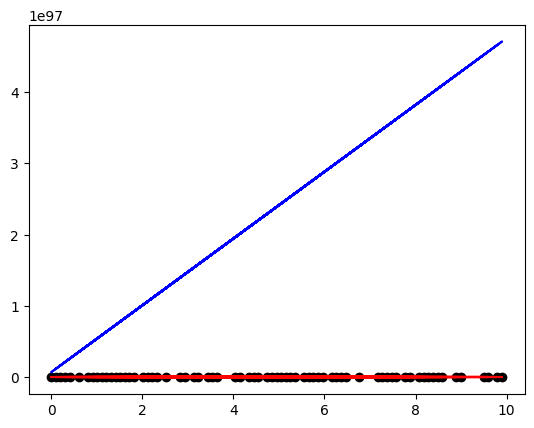

iteration  301 : (bias= 7.308897207961001e+95 ,w1: 4.676982167776874e+96 ) --->mse= 6.919833924689533e+194  | update: dbias= 4.514060857557766e+97 , dw1= 2.8885591812758607e+98
iteration  302 : (bias= -1.5261407079827833e+96 ,w1: -9.76581373860243e+96 ) --->mse= 3.017040340327382e+195  | update: dbias= -9.42562446428558e+97 , dw1= -6.031481396620063e+98
iteration  303 : (bias= 3.186671524160007e+96 ,w1: 2.0391593244497885e+97 ) --->mse= 1.3154264270252939e+196  | update: dbias= 1.968125803908746e+98 , dw1= 1.2594087763057575e+99
iteration  304 : (bias= -6.653957495383725e+96 ,w1: -4.257884557078999e+97 ) --->mse= 5.735245438344956e+196  | update: dbias= -4.109562389938741e+98 , dw1= -2.629719568935078e+99
iteration  305 : (bias= 1.3893854454309982e+97 ,w1: 8.890713287596393e+97 ) --->mse= 2.5005610015332396e+197  | update: dbias= 8.581007882350824e+98 , dw1= 5.491009068179764e+99
iteration  306 : (bias= -2.901118495744414e+97 ,w1: -1.8564332053302435e+98 ) --->mse= 1.0902419764956605e+

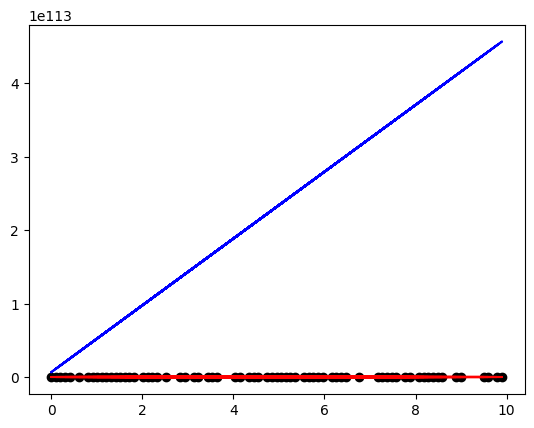

iteration  351 : (bias= 7.095581493466931e+111 ,w1: 4.540480892083923e+112 ) --->mse= 6.52180708402401e+226  | update: dbias= 4.3823145640060124e+113 , dw1= 2.8042543883529156e+114
iteration  352 : (bias= -1.481599132656313e+112 ,w1: -9.480791049680656e+112 ) --->mse= 2.843501054863273e+227  | update: dbias= -9.150530457632734e+113 , dw1= -5.855448032492814e+114
iteration  353 : (bias= 3.0936660961600533e+112 ,w1: 1.9796449112783417e+113 ) --->mse= 1.2397634804033071e+228  | update: dbias= 1.9106845579684286e+114 , dw1= 1.222651974928782e+115
iteration  354 : (bias= -6.45975669368209e+112 ,w1: -4.133614963365569e+113 ) --->mse= 5.405355783895162e+228  | update: dbias= -3.9896216912909526e+114 , dw1= -2.55296920662934e+115
iteration  355 : (bias= 1.3488351762772675e+113 ,w1: 8.631231069781133e+113 ) --->mse= 2.3567294578627257e+229  | update: dbias= 8.330564651939939e+114 , dw1= 5.33074979932641e+115
iteration  356 : (bias= -2.816447149692702e+113 ,w1: -1.8022517926850915e+114 ) --->mse

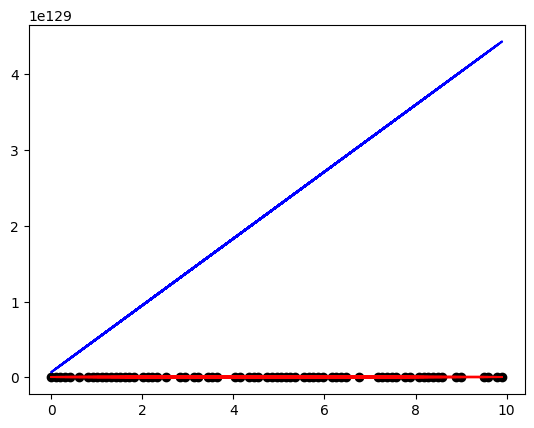

iteration  401 : (bias= 6.888491560066148e+127 ,w1: 4.407963509764385e+128 ) --->mse= 6.1466746318097465e+258  | update: dbias= 4.254413386063531e+129 , dw1= 2.7224100948221374e+130
iteration  402 : (bias= -1.4383575370251509e+128 ,w1: -9.204086964346302e+128 ) --->mse= 2.6799436987743907e+259  | update: dbias= -8.88346527843667e+129 , dw1= -5.684552335755743e+130
iteration  403 : (bias= 3.0033751021931844e+128 ,w1: 1.9218674714432412e+129 ) --->mse= 1.1684526445295124e+260  | update: dbias= 1.8549197784047094e+130 , dw1= 1.1869679487085962e+131
iteration  404 : (bias= -6.271223789830363e+128 ,w1: -4.0129722720997397e+129 ) --->mse= 5.094441286704606e+260  | update: dbias= -3.8731815530014437e+130 , dw1= -2.478458861922299e+131
iteration  405 : (bias= 1.3094683975176855e+129 ,w1: 8.379322037511754e+129 ) --->mse= 2.221171062874423e+261  | update: dbias= 8.087430797364444e+130 , dw1= 5.17516781891576e+131
iteration  406 : (bias= -2.734247001164537e+129 ,w1: -1.7496517057067042e+130 ) --

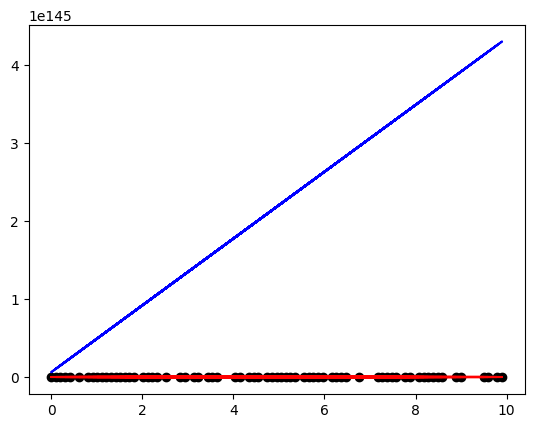

iteration  451 : (bias= 6.68744570361035e+143 ,w1: 4.279313747865281e+144 ) --->mse= 5.79311968946218e+290  | update: dbias= 4.130245101111759e+145 , dw1= 2.642954489140568e+146
iteration  452 : (bias= -1.396377980194845e+144 ,w1: -8.93545869783756e+144 ) --->mse= 2.5257941143777426e+291  | update: dbias= -8.62419459927197e+145 , dw1= -5.518644359685166e+146
iteration  453 : (bias= 2.9157193194411396e+144 ,w1: 1.865776310058827e+145 ) --->mse= 1.10124358725575e+292  | update: dbias= 1.800782536273488e+146 , dw1= 1.1523253878877172e+147
iteration  454 : (bias= -6.0881933619263005e+144 ,w1: -3.8958506293797586e+145 ) --->mse= 4.8014105012303525e+292  | update: dbias= -3.7601398085582666e+146 , dw1= -2.406123158199545e+147
iteration  455 : (bias= 1.2712505680865032e+145 ,w1: 8.134765161617968e+145 ) --->mse= 2.0934099474552694e+293  | update: dbias= 7.851392988940746e+146 , dw1= 5.024126616733256e+147
iteration  456 : (bias= -2.65444592638387e+145 ,w1: -1.6985867922048317e+146 ) --->mse= 

C:\Users\P52s\AppData\Local\Temp\ipykernel_17688\2262849856.py:22: RuntimeWarning: overflow encountered in scalar add
  mse=(1/n)*sum(squared_error) #mean squared error
C:\Users\P52s\AppData\Local\Temp\ipykernel_17688\2262849856.py:21: RuntimeWarning: overflow encountered in square
  squared_error=error**2 #squared error


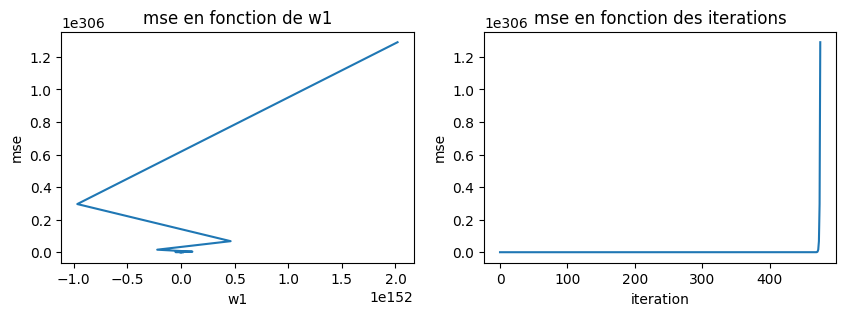

In [38]:

def train2(X,y):
    #hyperparameters initialisation: tuning parameters
    learning_rate=0.05
    epochs=500
    #model parameters initialisation
    w1=0.5 #
    bias=1
    #----------------------
    n=len(X) #data size
    global mseList
    global w1List
    mseList=[]
    w1List=[]
       
 
    #training
    for i in range(epochs):
        yhat=bias+w1*X #prediction
        
        error=y-yhat # Error
        squared_error=error**2 #squared error
        mse=(1/n)*sum(squared_error) #mean squared error
        #print("(",bias, ",", w1, ") ----->",mse)
        mseList.append(mse)
        w1List.append(w1)
       
    
        dw1=(-2/n)*np.sum(X*(y-yhat)) # partial derivate of mse / w1
        dbias=(-2/n)*np.sum((y-yhat)) #partial derivate of mse / w1
        print("iteration ",i,": (bias=",round(bias,2),",w1:",round(w1,2),") --->mse=",round(mse,2)," | update: dbias=",round(dbias,2),", dw1=",round(dw1,2))

        w1=w1-dw1*learning_rate # orientation (-) + pas d'apprentissage (l)
        bias=bias-dbias*learning_rate
        if i%50==0:
            plot_data_model(X,y,bias,w1)

    return bias,w1
        
#exécution
bias,w1=train2(X_train,y_train)
tracer_graphes(w1List,mseList,[i for i in range(500)])

<h3 style="color:Tomato;">questions</h3>
<p>
    <span style="color:Tomato;"><b> 1) </b></span>
    <span  style="color:DodgerBlue;">comment varie mse dans les 5 premières itérations? comment justifier ce résultat? il s'agit de quel problème? </span>
</p>
<p>
    <span style="color:Tomato;"><b> 2) </b></span>
    <span  style="color:DodgerBlue;">qu'est ce qui se passe si on augmente le nombre d'itération(500)?. Expliquer le résultat obtenu</span>
</p>

<p>
    <span style="color:Tomato;"><b> 3) </b></span>
    <span  style="color:DodgerBlue;">quelles sont les recommandations à faire pour corriger ce problème</span>
</p>

<p>
    <span style="color:Tomato;"><b> 4) </b></span>
    <span  style="color:DodgerBlue;">donner à learning_rate la valeur 0.01 au lieu de 0.1 et refaire l'exécution. qu'est ce que vous constatez? comment expliquer le résultat obtenu? </span>
</p>

<p>
    <span style="color:Tomato;"><b> 5) </b></span>
    <span  style="color:DodgerBlue;">Augmenter le nombre d'epochs à 500, puis tracer les graphes à chaque 50 itération. expliquer les résultats obtenus </span>
</p>







<h3 style="color:Tomato;">I.3. Linear Regression Model: Many Feature feature (Advertissing problem)</h3>


<p>Objectif est de prévoir les ventes (sales) à realiser suite à un investissement en publicité <br>
la publicité peut se faire en TV, RADIO, NewsPaper
 question: quelle est la meilleur combinaison à utiliser pour faire un bon Sales.
    exemple: si on souhaite investir 10000 Euro (TV=?, Radio? NewsPaper? afinde maximiser Sales)   
</p>
<p>trouver le modele: Sales(TV,Radio, Neawspaper)=bias+w1*TV+w2*radio+w3*newsPaper</p>

<h4 style="color:Tomato;">Step 1: Load / Initialize Data</h4>

In [141]:
import pandas as pnd #dataframe
data_frame=pnd.read_csv("../data/advertising.csv")
data_frame.head()
#les trois premières colonnes: features
#la dernière colonne target

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [142]:
#convertir le dataframe en array
data=np.array(data_frame)
#extraire la partie features
X=np.array([data[i,:3] for i in range(len(data))])
#extraire la partie target
y=np.array([data[i,3] for i in range(len(data))])

Epoch: 0 MSE: 256.71195
Epoch: 10 MSE: 171.89940555033965
Epoch: 20 MSE: 115.46644009309264
Epoch: 30 MSE: 77.89288986907259
Epoch: 40 MSE: 52.8619098014384
Epoch: 50 MSE: 36.17813289567096
Epoch: 60 MSE: 25.052853093729183
Epoch: 70 MSE: 17.631025686037074
Epoch: 80 MSE: 12.677878727728931
Epoch: 90 MSE: 9.371042293494847


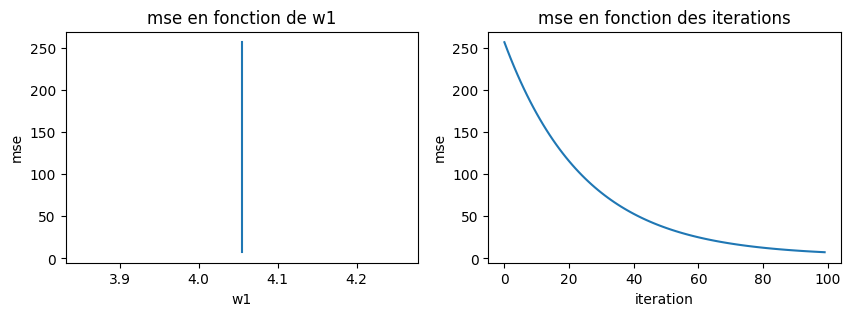

In [156]:

x1,x2,x3=X[:,0],X[:,1],X[:,2]

def train3(x1, x2, x3, y):

    learning_rate = 0.01
    epochs = 100
    
    w = np.array([0.0, 0.0, 0.0])  
    bias = 0.0
    #----------------------
    n = len(x1) 
    global mseList
    global wList
    mseList = []
    wList = []

    # Training
    for i in range(epochs):
        yhat = bias + np.dot(np.array([x1, x2, x3]).T, w) 

        error = y - yhat 
        squared_error = error**2  
        mse = (1/n) * np.sum(squared_error)  
        mseList.append(mse)
        wList.append(w)

        dw = (-2/n) * np.dot(np.array([x1, x2, x3]), error)  
        dbias = (-2/n) * np.sum(error) 

        w -= learning_rate * dw 
        bias -= learning_rate * dbias  

        if i % 10 == 0:
            print("Epoch:", i, "MSE:", mse)

    return bias, w, mseList, wList

bias, w, mse_list, w_list = train3(x1,x2,x3, y)
tracer_graphes([w[0] for w in w_list], mse_list, [i for i in range(100)])

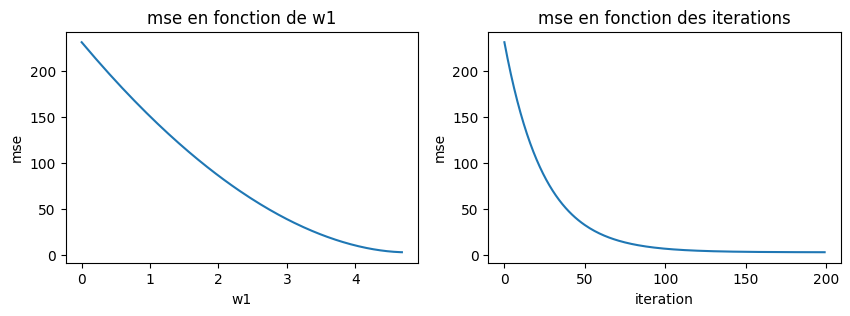

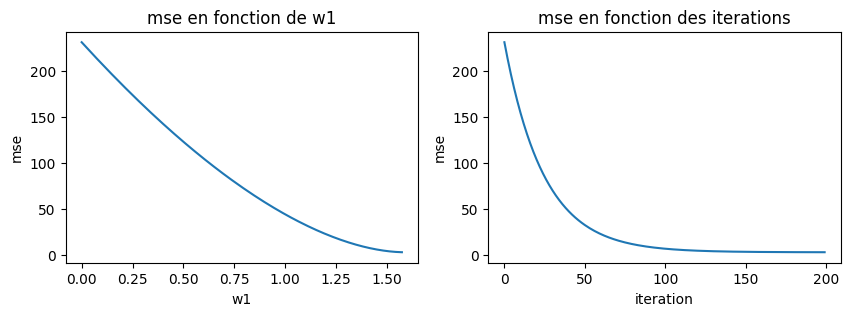

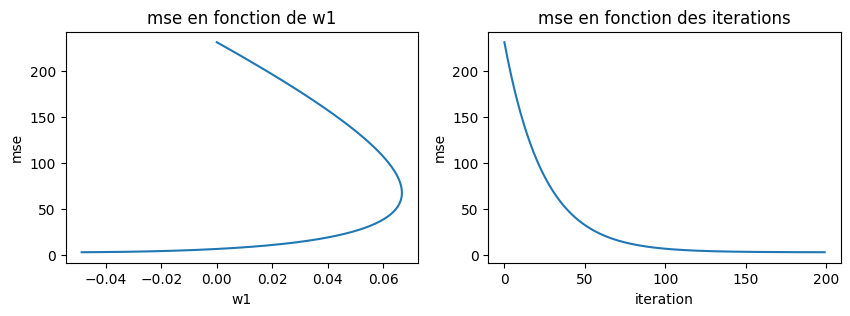

In [154]:
import pandas as pd

# Standardize the features (optional, but recommended)
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

# Function to train the model using matrices and vectors
def train4(X, y, learning_rate=0.01, epochs=200):
    n = len(X)
    num_features = X.shape[1]
    w = np.zeros(num_features)
    bias = 1
    mse_list = []
    w_list = []

    for i in range(epochs):
        y_pred = bias + np.dot(X, w)

        error = y - y_pred
        squared_error = error ** 2
        mse = np.mean(squared_error)
        mse_list.append(mse)
        w_list.append(w.copy())

        # Compute gradients using matrix operations
        grad_w = (-2 / n) * np.dot(X.T, error)
        grad_bias = (-2 / n) * np.sum(error)

        # Update weights and bias
        w -= learning_rate * grad_w
        bias -= learning_rate * grad_bias

    # Create a DataFrame for w_list
    w_df = pd.DataFrame(w_list, columns=[f'w_{i}' for i in range(num_features)])

    return bias, w_df, mse_list

# Train the model using train4
bias, w_df, mse_list = train4(X_train, y_train, learning_rate=0.01, epochs=200)



tracer_graphes(w_df['w_0'], mse_list, [i for i in range(200)])
tracer_graphes(w_df['w_1'], mse_list, [i for i in range(200)])
tracer_graphes(w_df['w_2'], mse_list, [i for i in range(200)])


<Axes: >

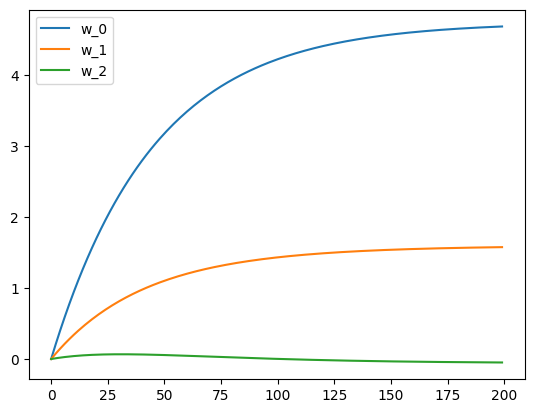

In [157]:
w_df.plot()

In [158]:

class NN_One_Neurone:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.bias = 0
        self.weights = np.zeros(3)

    def predict(self, X):
        return self.bias + np.dot(X, self.weights)

    def fit(self, X, y):
        n = len(X)
        for _ in range(self.epochs):
            yhat = self.predict(X)
            error = y - yhat
            mse = np.mean(error ** 2)

            grad_weights = (-2 / n) * np.dot(X.T, error)
            grad_bias = (-2 / n) * np.sum(error)

            self.weights -= self.learning_rate * grad_weights
            self.bias -= self.learning_rate * grad_bias

    def get_weights(self):
        return self.bias, self.weights


In [160]:
from IPython.display import display


model = NN_One_Neurone(learning_rate=0.01, epochs=100)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

bias, weights = model.get_weights()

display(bias)
display(weights)

13.166780944730084

array([ 4.22366798,  1.42756395, -0.00982906])

<h3 style="color:Tomato;">questions</h3>

<p>
    <span style="color:Tomato;"><b> 1) </b></span>
    <span  style="color:DodgerBlue;">donner la forme du modèle à entrainer </span>
</p>

<p>
    <span style="color:Tomato;"><b> 2) </b></span>
    <span  style="color:DodgerBlue;">en reprenant la fonction train2, compléter la fonction train3 afin de trouver le modèle adéquat.</span>
</p>
<p>
    <span style="color:Tomato;"><b> 3) </b></span>
    <span  style="color:DodgerBlue;">Tester le modèle. pourqoui le modèle ne donne pas les résultats obtenus? il s'agit de quel problème? quels sont changement à faire pour éviter ce problème?</span>
</p>

<p>
    <span style="color:Tomato;"><b> 4) </b></span>
    <span  style="color:DodgerBlue;">écrire une fonction train4 en reprenant le code de train3 de manière à utiliser matrices/vecteurs </span>
</p>

<p>
    <span style="color:Tomato;"><b> 5) </b></span>
    <span  style="color:DodgerBlue;">écrire une classe NN_One_Neurone avec les fonctions qu'il faut. </span>
</p>






